In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 3)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from catboost import CatBoostClassifier

In [3]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
positive = heart[heart.HeartDisease == 1]
negative = heart[heart.HeartDisease == 0]

In [10]:
'''
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
'''
#group.mean()[['Male', 'Female']]
#group.mean().T

"\nAge: age of the patient [years]\nSex: sex of the patient [M: Male, F: Female]\nChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\nRestingBP: resting blood pressure [mm Hg]\nCholesterol: serum cholesterol [mm/dl]\nFastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\nRestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\nMaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina: exercise-induced angina [Y: Yes, N: No]\nOldpeak: oldpeak = ST [Numeric value measured in depression]\nST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\nHeartDisease: output class [1: heart disease, 0: Normal]\n"

In [11]:
heart.mean()

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

In [12]:
heart.columns[2]

'ChestPainType'

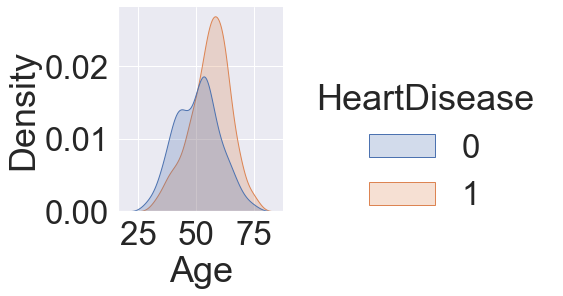

In [13]:
sns.displot(heart, x=heart.columns[0], hue="HeartDisease", kind="kde", fill=True)

-  Make a bar chart for sex. 

In [14]:
num_cols=heart.select_dtypes(include=np.number).columns.tolist()
print('There are', len(num_cols), 'numerical features, including:')
print(num_cols, "\n")

# Extract categorical features
cat_cols=heart.select_dtypes(object).columns.tolist()
print('There are', len(cat_cols), 'categorical features, including:')
print(cat_cols)

There are 7 numerical features, including:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'] 

There are 5 categorical features, including:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Sex
F    193
M    725
dtype: int64


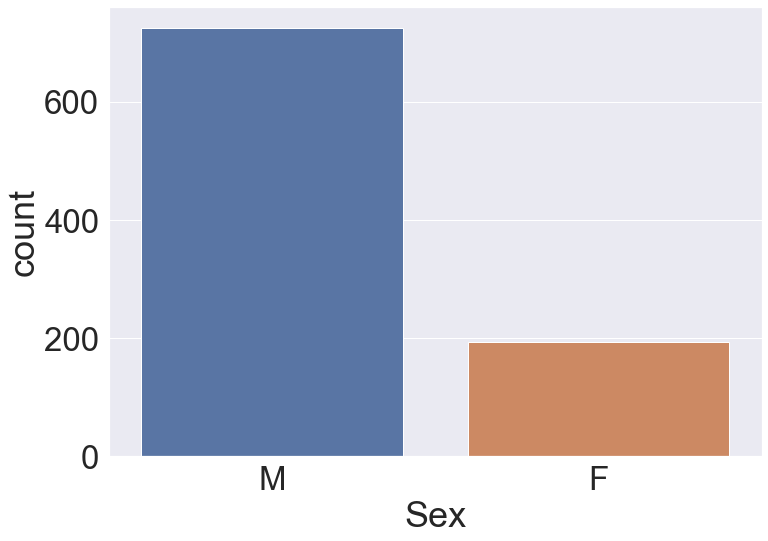

In [15]:
def make_single_bar(cat):
    g = sns.countplot(x = heart[cat], data = heart)
    df1 = heart.groupby(cat)
    print(df1.size())
make_single_bar('Sex')

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64


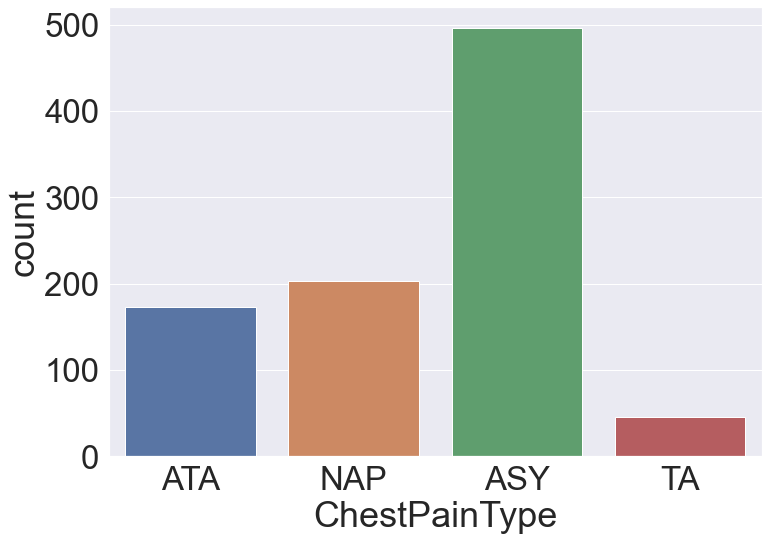

In [16]:
make_single_bar('ChestPainType')

FastingBS
0    704
1    214
dtype: int64


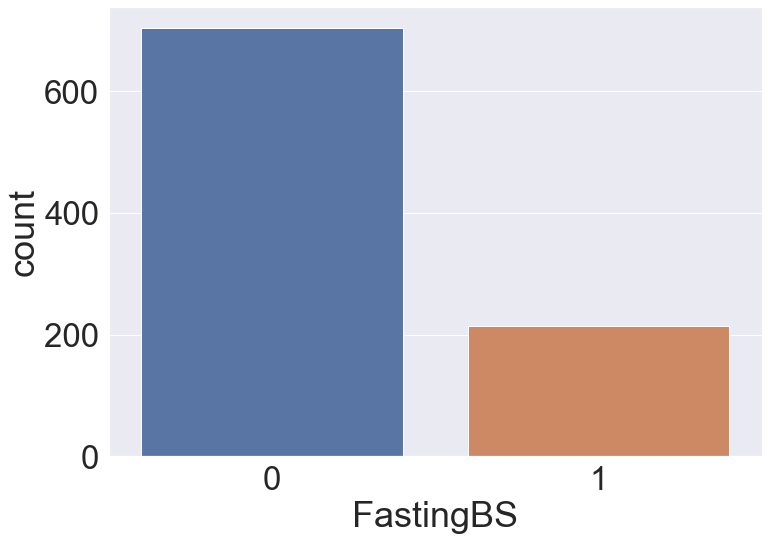

In [17]:
make_single_bar('FastingBS')

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64


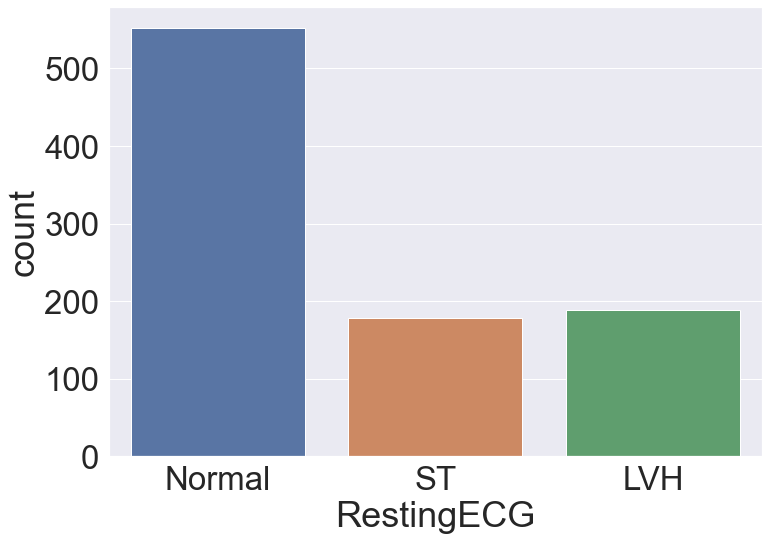

In [18]:
make_single_bar('RestingECG')

ExerciseAngina
N    547
Y    371
dtype: int64


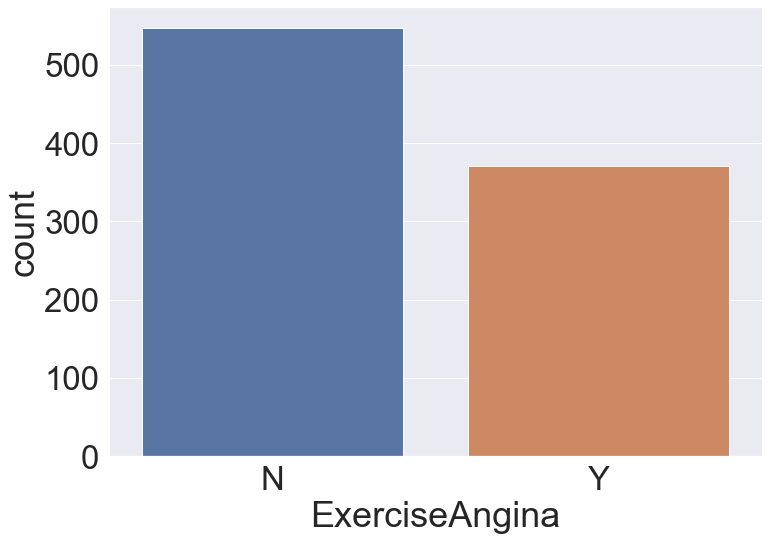

In [19]:
make_single_bar('ExerciseAngina')

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64


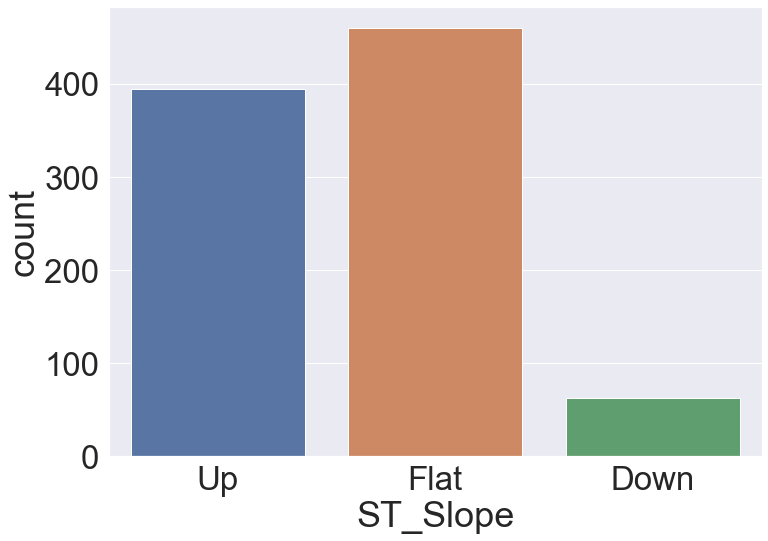

In [20]:
sns.set(font_scale = 3)
make_single_bar('ST_Slope')

In [21]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [22]:
heart[['Age', 'RestingBP', 'Cholesterol']].agg(['mean', 'std', 'median'])

,Age,RestingBP,Cholesterol
mean,53.510893,132.396514,198.799564
std,9.432617,18.514154,109.384145
median,54.000000,130.000000,223.000000


In [23]:
heart[['MaxHR', 'Oldpeak']].agg(['mean', 'std', 'median'])

,MaxHR,Oldpeak
mean,136.809368,0.887364
std,25.460334,1.066570
median,138.000000,0.600000


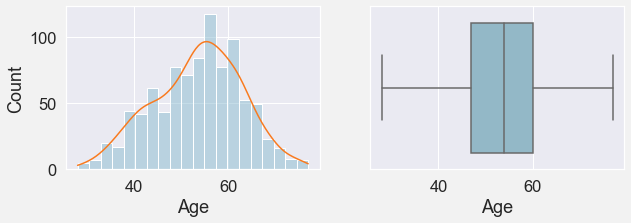

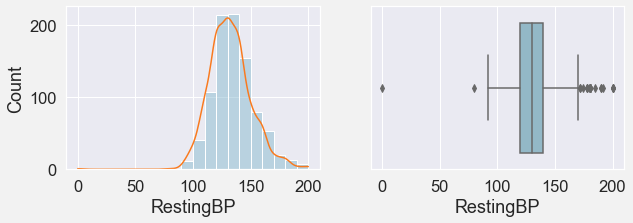

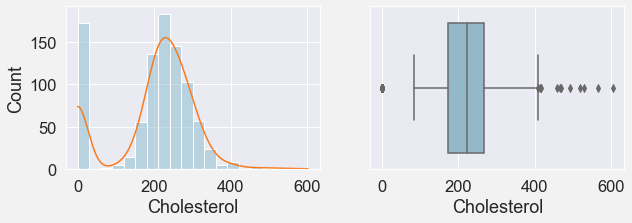

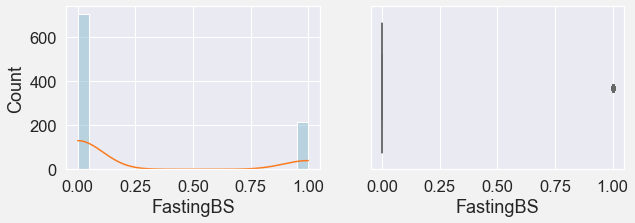

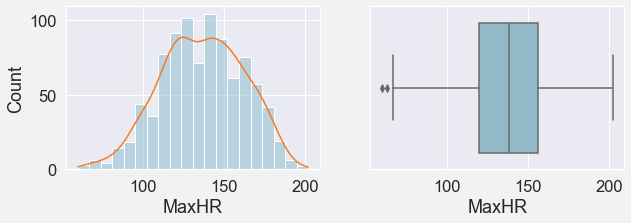

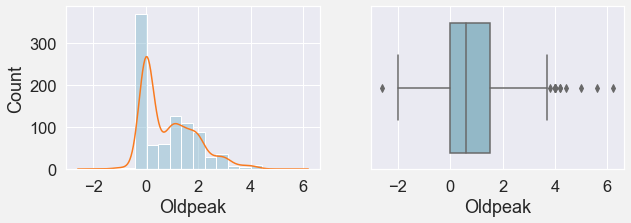

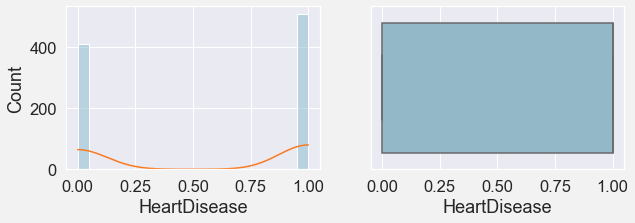

In [24]:
# Plots on numerical features to check data quality and data distribution
color ='#8abbd0'
sns.set(font_scale = 1.5)
for i in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(heart[i], bins=20, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    #sns.kdeplot(x=i,data=heart, hue='HeartDisease',ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=i, data=heart,ax=ax[1], color=color)
    #sns.boxplot(x=i, data=heart, hue='HeartDisease',y=[""]*len(heart),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout

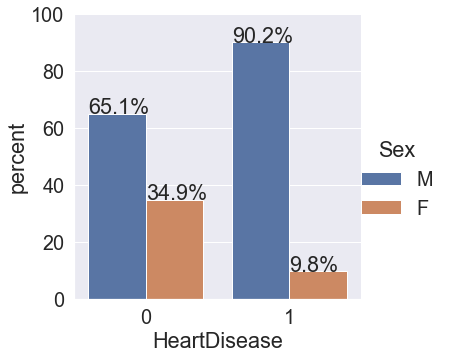

In [25]:
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
sns.set(font_scale = 1.8)
def make_bar_plot(y, x = 'HeartDisease'):

    df1 = heart.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
make_bar_plot('Sex')

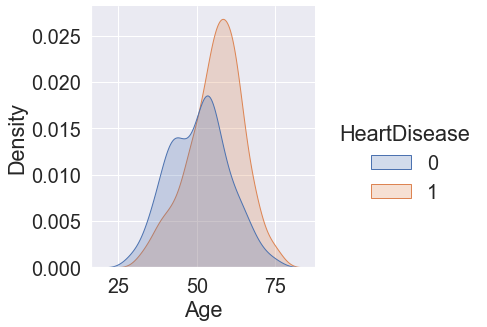

In [26]:
sns.displot(heart, x=heart.columns[0], hue="HeartDisease", kind="kde", fill=True)

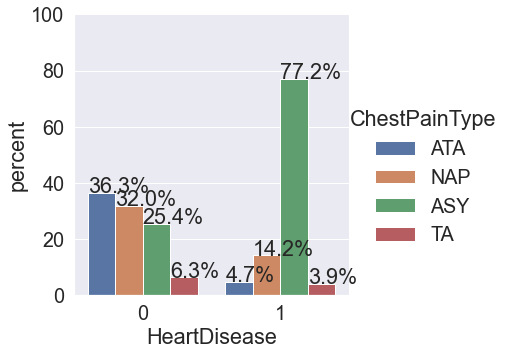

In [27]:
make_bar_plot('ChestPainType')

In [28]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


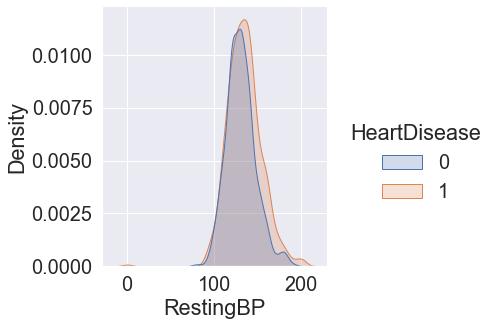

In [29]:
sns.displot(heart, x=heart.columns[3], hue="HeartDisease", kind="kde", fill=True)

1


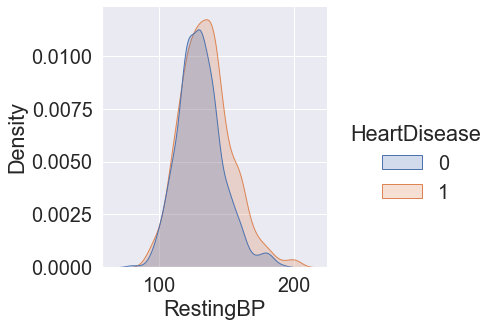

In [30]:
print(len(heart[heart['RestingBP']==0]))
row = heart[heart['RestingBP']==0].index
heart = heart.drop(heart.index[row])
sns.displot(heart, x=heart.columns[3], hue="HeartDisease", kind="kde", fill=True)

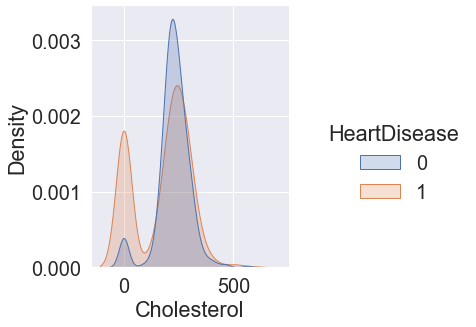

In [31]:
sns.displot(heart, x=heart.columns[4], hue="HeartDisease", kind="kde", fill=True)

In [32]:
# Impute zero values with median
median_values = heart['Cholesterol'].median()
row = heart[heart['Cholesterol']==0].index
heart.loc[row, 'Cholesterol'] = median_values

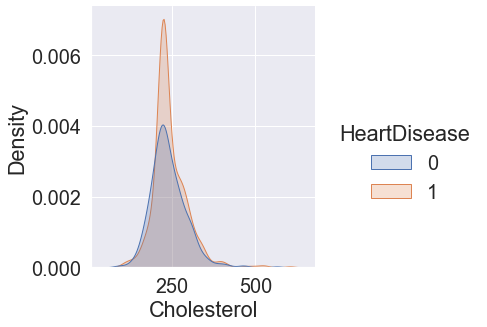

In [33]:
sns.displot(heart, x=heart.columns[4], hue="HeartDisease", kind="kde", fill=True)

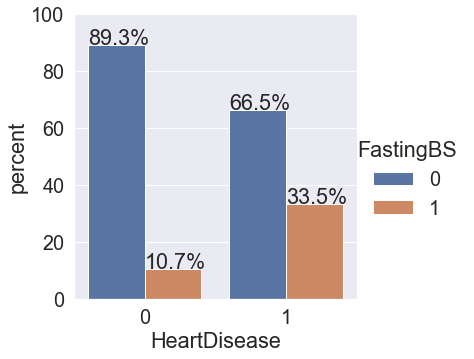

In [34]:
#sns.displot(heart, x=heart.columns[5], hue="HeartDisease", kind="kde", fill=True)
make_bar_plot('FastingBS')

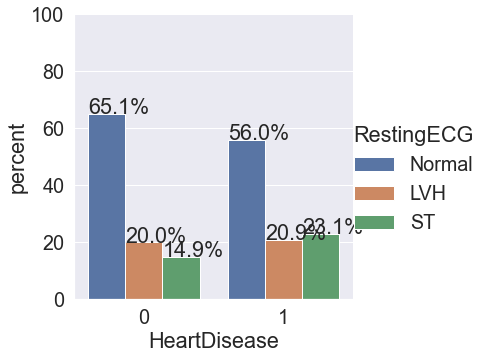

In [35]:
make_bar_plot('RestingECG')

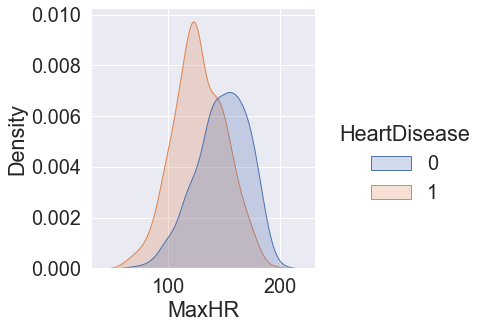

In [36]:
sns.displot(heart, x=heart.columns[7], hue="HeartDisease", kind="kde", fill=True)

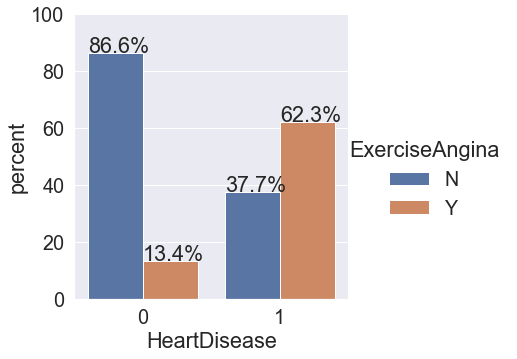

In [37]:
make_bar_plot('ExerciseAngina')

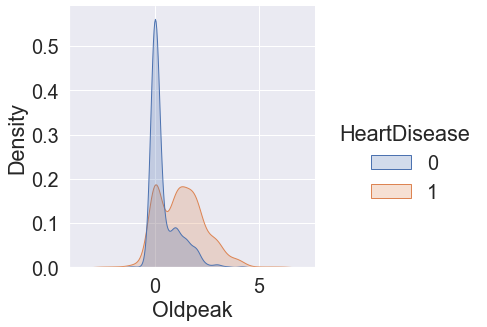

In [38]:
sns.displot(heart, x=heart.columns[9], hue="HeartDisease", kind="kde", fill=True)

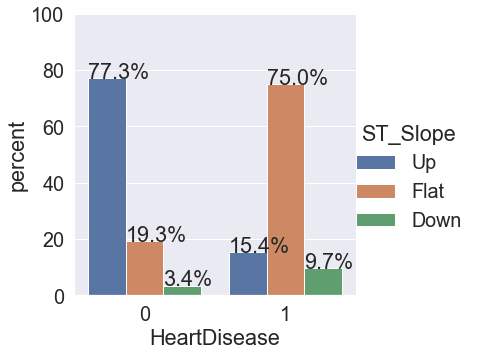

In [39]:
make_bar_plot('ST_Slope')

In [40]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
heart[cat_cols] = heart[cat_cols].astype('str').apply(LabelEncoder().fit_transform)

In [41]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [42]:
heart[heart['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Text(0.5, 1.0, 'Correlation Heatmap')

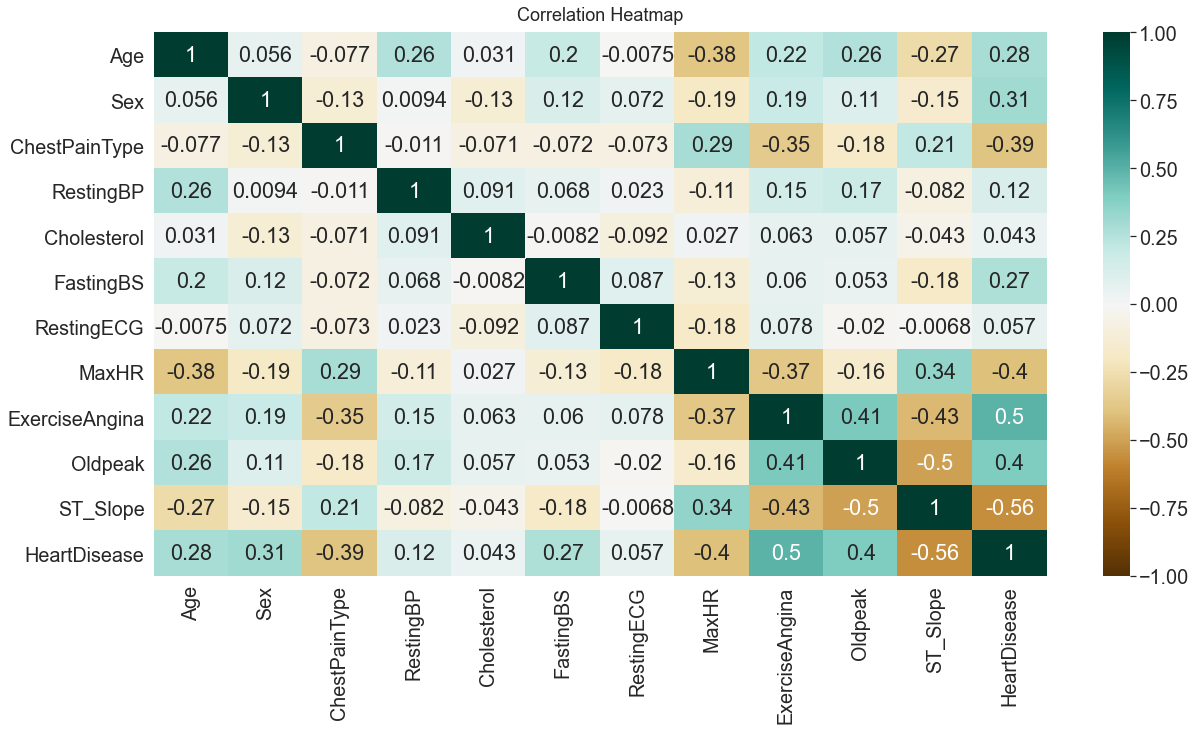

In [43]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(heart.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [44]:
heart.corr?

In [45]:
# https://www.kaggle.com/lynnxy/heart-failure-prediction-eda-rf-accuracy-86
X = heart.iloc[:,:-1]
y=heart.iloc[:,-1]

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
rf = RandomForestClassifier()

# Fitting models
rf.fit(X_train, y_train)  
# Predict target value     
y_pred = rf.predict(X_test)      

# Calculate the accuracy of the model
score = rf.score(X_test, y_test).round(3)*100 
score

85.9

Text(0.5, 1.0, 'Feature importance')

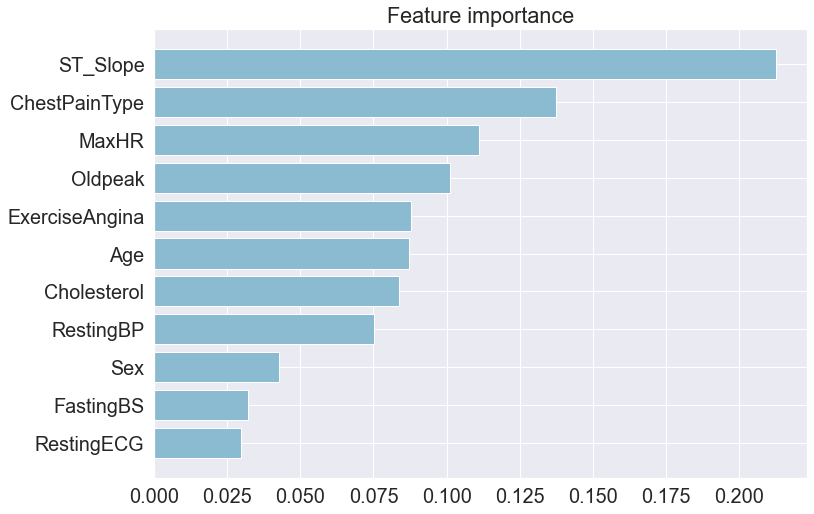

In [63]:
importances = rf.feature_importances_

# plot feature importance
indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices], color='#8abbd0')
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.title('Feature importance')

## Redoing things 6 months later

In [113]:
df = pd.read_csv('heart.csv')

In [114]:
# Check for missingness
df.isna().sum().sort_values(ascending=False).head()

Age              0
Sex              0
ChestPainType    0
RestingBP        0
Cholesterol      0
dtype: int64

### Set Cholesterol to the median among the nonzero values for corresponding to each HeartDisease class

In [115]:
nz = df[df['Cholesterol'] != 0]
df.loc[(df['Cholesterol']==0) & (df['HeartDisease'] == 0), 
       'Cholesterol'] = nz.groupby('HeartDisease').median()['Cholesterol'][0]
df.loc[(df['Cholesterol']==0) & (df['HeartDisease'] == 1), 
       'Cholesterol'] = nz.groupby('HeartDisease').median()['Cholesterol'][1]

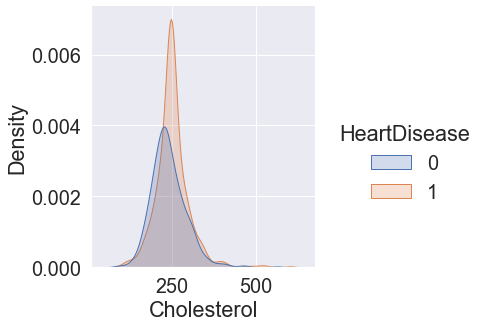

In [116]:
sns.displot(df, x=df.columns[4], hue="HeartDisease", kind="kde", fill=True)

### Convert categorical variables to OHE

In [117]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [122]:
df = pd.get_dummies(df)

Text(0.5, 1.0, 'Correlation Heatmap')

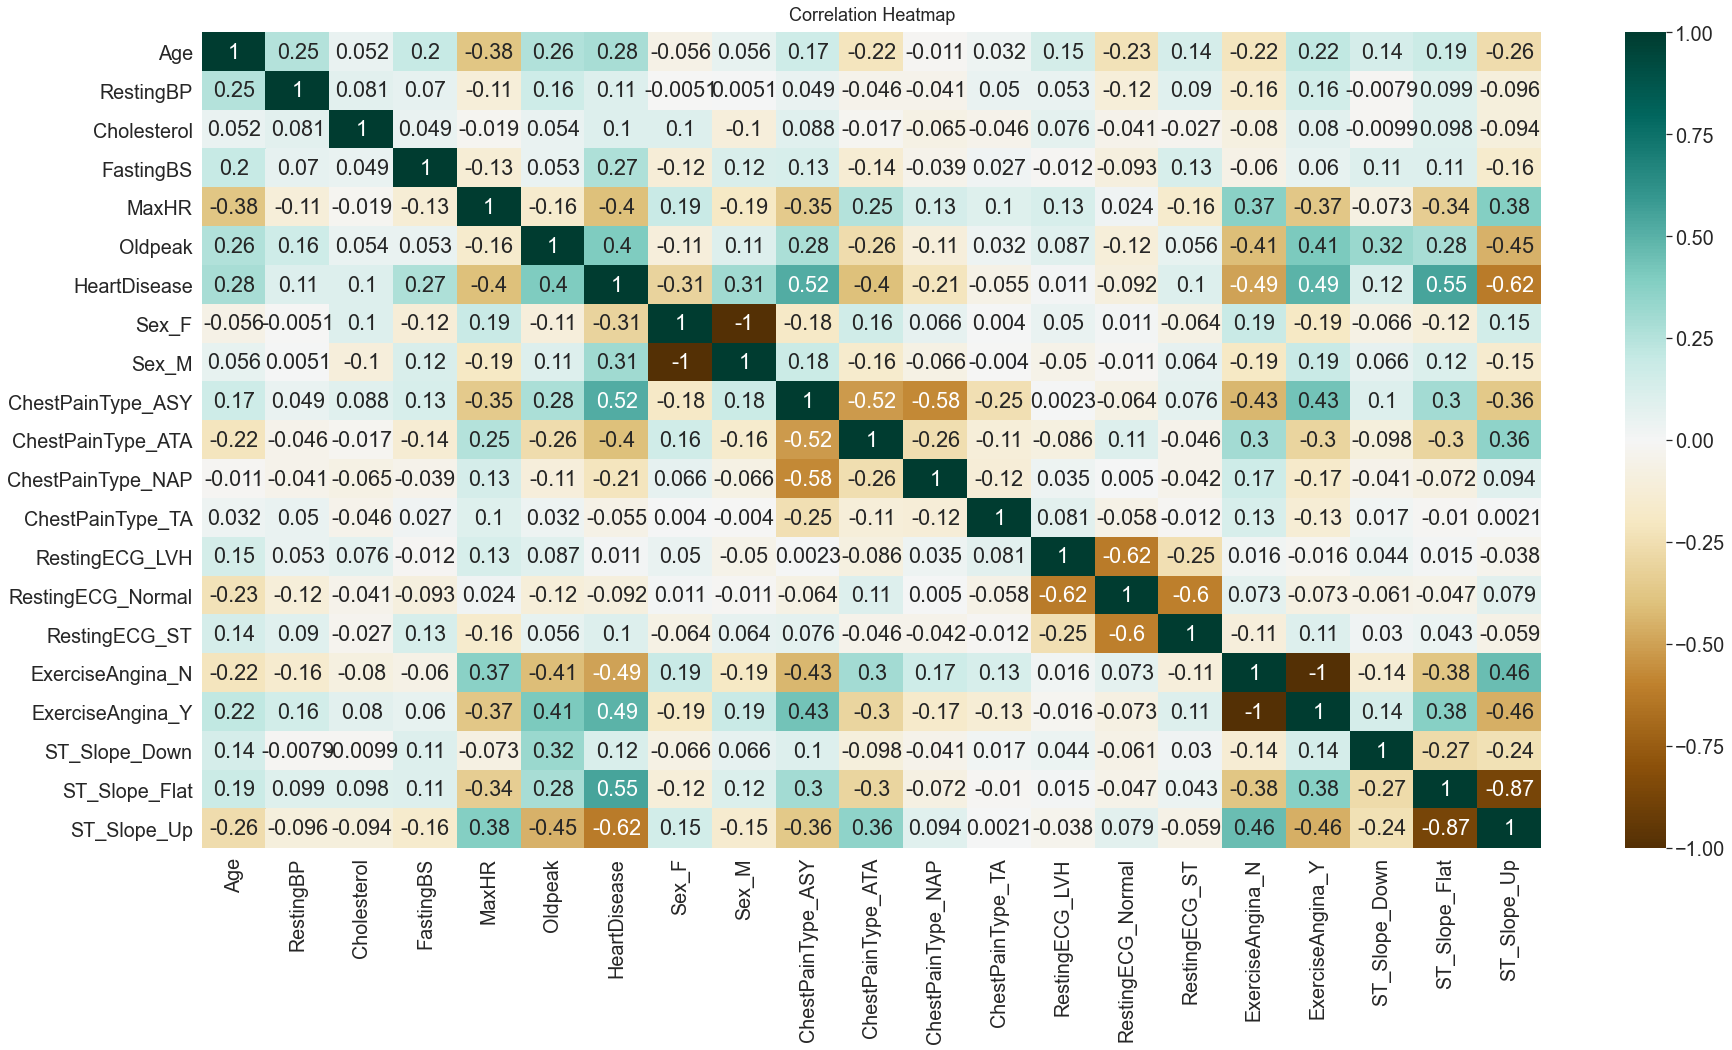

In [124]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [130]:
df.corr()['HeartDisease'].abs().sort_values(ascending = False)

HeartDisease         1.000000
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
ExerciseAngina_N     0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Sex_M                0.305445
Sex_F                0.305445
Age                  0.282039
FastingBS            0.267291
ChestPainType_NAP    0.212964
ST_Slope_Down        0.122527
RestingBP            0.107589
Cholesterol          0.103784
RestingECG_ST        0.102527
RestingECG_Normal    0.091580
ChestPainType_TA     0.054790
RestingECG_LVH       0.010670
Name: HeartDisease, dtype: float64

In [132]:
df = df.drop(columns = ['RestingECG_LVH', 'ChestPainType_TA', 'ST_Slope_Down', 'Sex_F', 'ExerciseAngina_N'])

In [133]:
df.corr()['HeartDisease'].abs().sort_values(ascending = False)

HeartDisease         1.000000
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
ChestPainType_NAP    0.212964
RestingBP            0.107589
Cholesterol          0.103784
RestingECG_ST        0.102527
RestingECG_Normal    0.091580
Name: HeartDisease, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

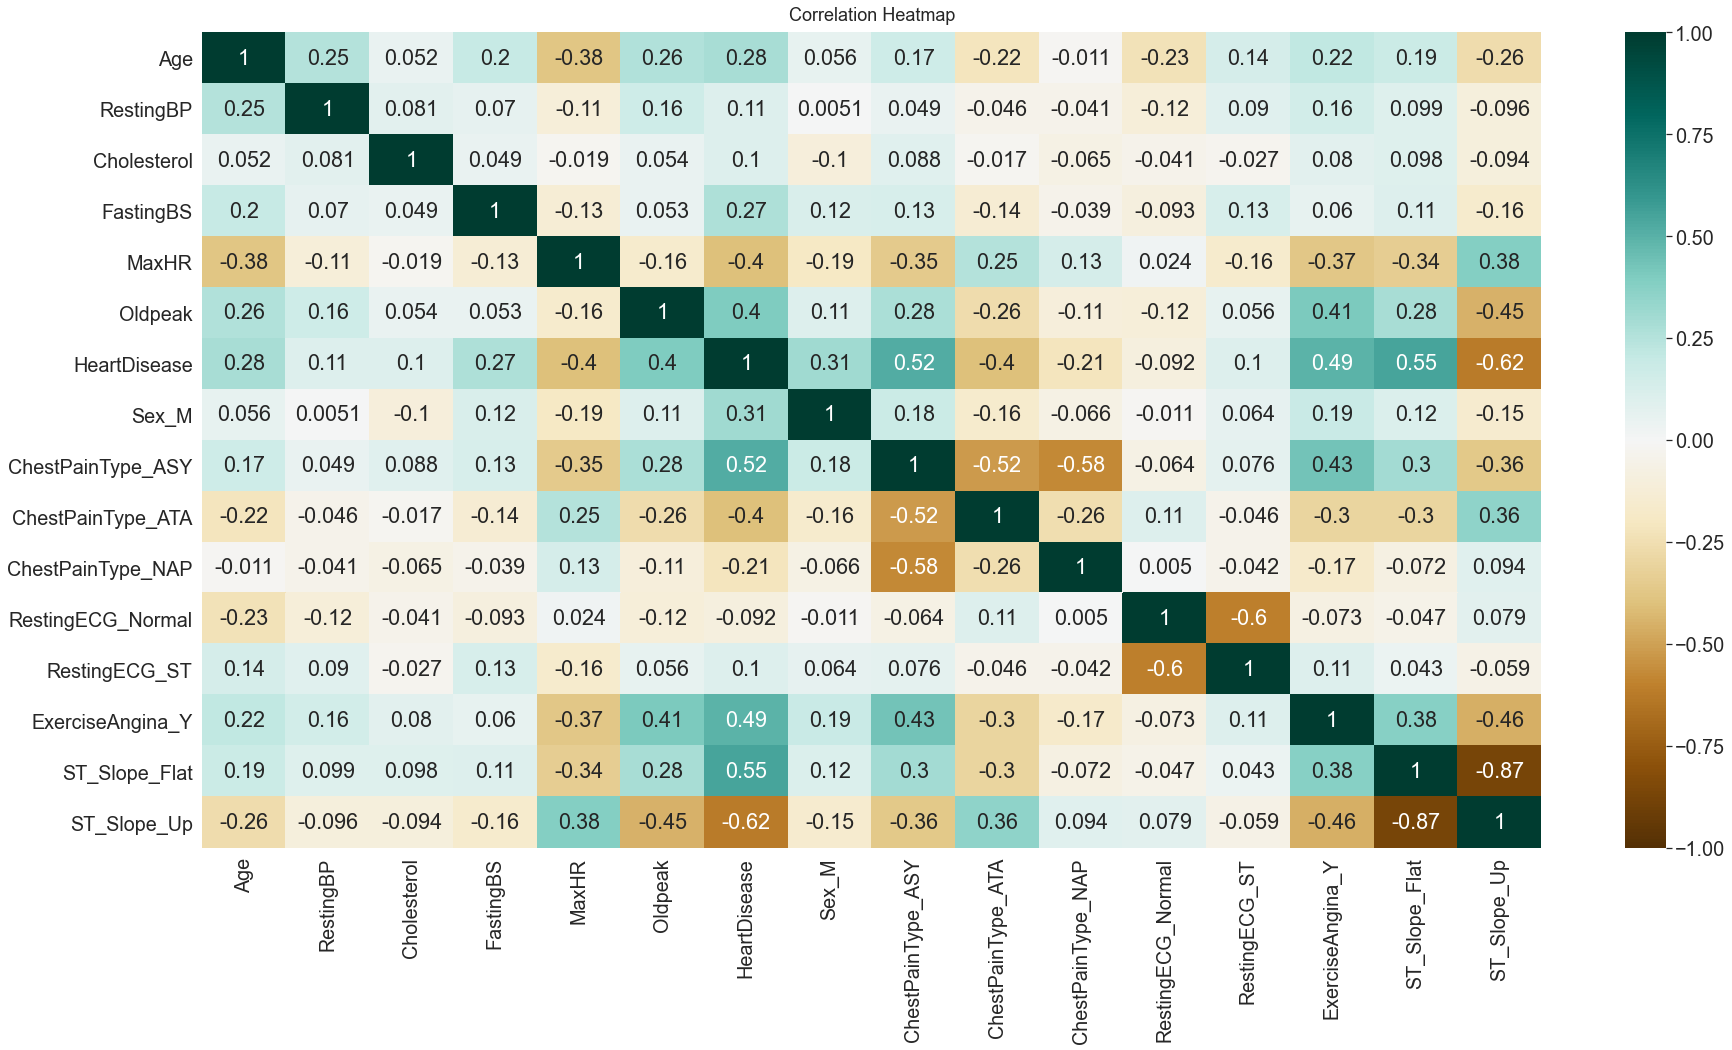

In [134]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [198]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

The training r2: 1.00000
The test     r2: 0.90870


The training r2: 1.00000
The test     r2: 0.86087


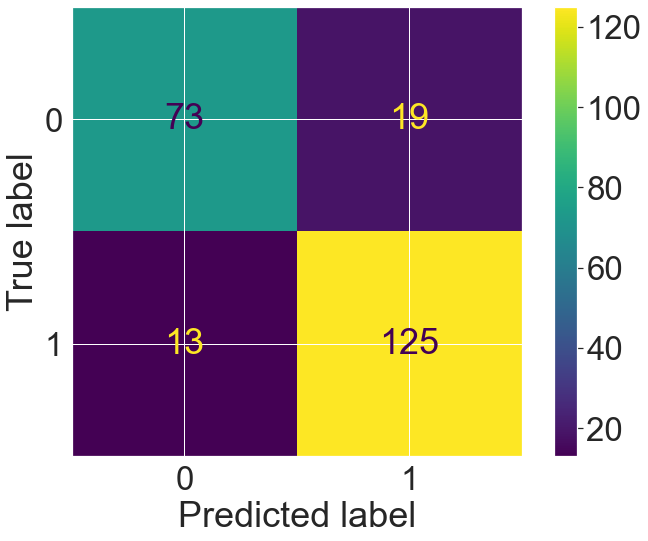

<BarContainer object of 15 artists>

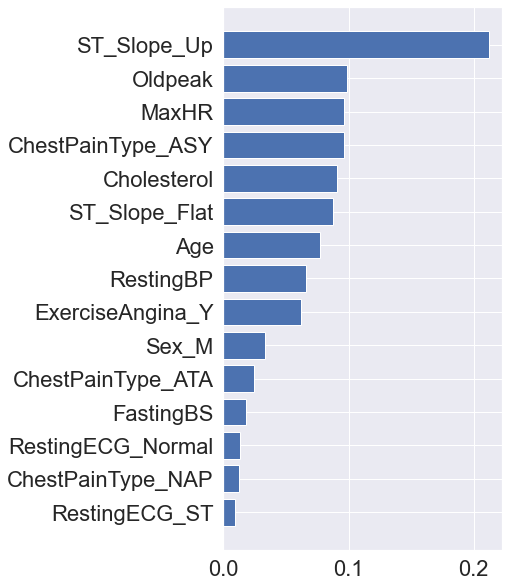

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()
sorted_idx = model.feature_importances_.argsort()
sns.set(rc = {'figure.figsize':(5,10)})
sns.set(font_scale = 2)
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15])

In [162]:
cm

array([[ 73,  19],
       [ 13, 125]])

In [163]:
# Accuracy
(73+125)/(73+19+13+125)

0.8608695652173913

In [164]:
# Sensitivity/Recall
125/(125+13)

0.9057971014492754

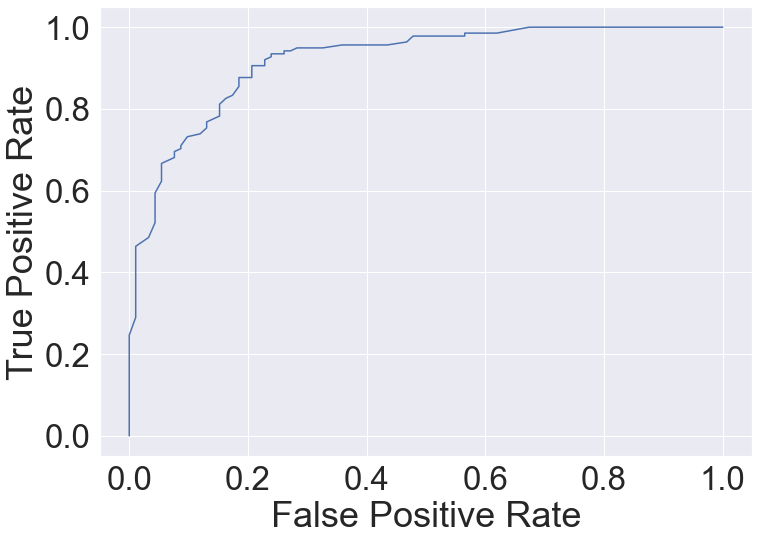

In [165]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [189]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,1,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,0,0,0,1,1,0,0,1,0
2,37,130,283.0,0,98,0.0,1,0,1,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,0,1,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0,0,0,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,0,0,1,0,0,0,0,1,0


In [200]:
# Standardize inputs
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [204]:
for col in X.columns: 
    X[col] = (X[col] - X[col].mean())/X[col].std()

In [205]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.410685,0.832609,-0.551041,1.382175,-0.831979,0.515671,-1.083547,2.074046,-0.532547,0.813831,-0.490182,-0.823108,-1.001635,1.150047
1,-0.478223,1.490940,-1.210266,-0.551041,0.753746,0.105606,-1.937107,-1.083547,-0.481624,1.875721,0.813831,-0.490182,-0.823108,0.997280,-0.868582
2,-1.750404,-0.129442,0.720157,-0.551041,-1.524307,-0.831979,0.515671,-1.083547,2.074046,-0.532547,-1.227418,2.037836,-0.823108,-1.001635,1.150047
3,-0.584238,0.302660,-0.573039,-0.551041,-1.131539,0.574398,-1.937107,0.921889,-0.481624,-0.532547,0.813831,-0.490182,1.213585,0.997280,-0.868582
4,0.051853,0.950812,-0.929137,-0.551041,-0.581664,-0.831979,0.515671,-1.083547,-0.481624,1.875721,0.813831,-0.490182,-0.823108,-1.001635,1.150047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902283,-1.209697,0.364060,-0.551041,-0.188897,0.293123,0.515671,-1.083547,-0.481624,-0.532547,0.813831,-0.490182,-0.823108,0.997280,-0.868582
914,1.536064,0.626736,-0.966621,1.812770,0.164595,2.355810,0.515671,0.921889,-0.481624,-0.532547,0.813831,-0.490182,-0.823108,0.997280,-0.868582
915,0.369898,-0.129442,-2.128623,-0.551041,-0.856602,0.293123,0.515671,0.921889,-0.481624,-0.532547,0.813831,-0.490182,1.213585,0.997280,-0.868582
916,0.369898,-0.129442,-0.160716,-0.551041,1.460728,-0.831979,-1.937107,-1.083547,2.074046,-0.532547,-1.227418,-0.490182,-0.823108,0.997280,-0.868582


The training r2: 0.87791
The test     r2: 0.82609


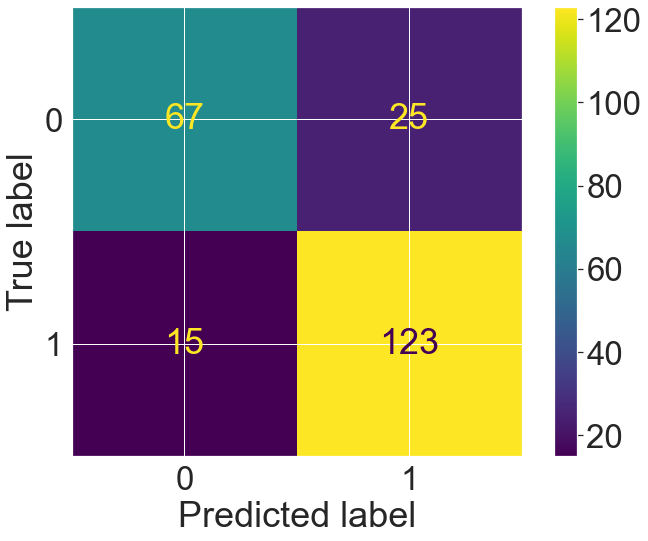

In [206]:
# LogisticRegression
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(penalty='none', max_iter=1000, random_state=0)
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [221]:
log_import = pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_[0])), columns=['features', 'coef'])
log_import['coef'] = log_import['coef'].abs()
log_import.sort_values(by='coef', ascending=False)

,features,coef
14,ST_Slope_Up,0.828294
6,Sex_M,0.710924
3,FastingBS,0.599279
7,ChestPainType_ASY,0.578362
13,ST_Slope_Flat,0.442105
12,ExerciseAngina_Y,0.418957
8,ChestPainType_ATA,0.386969
5,Oldpeak,0.362144
2,Cholesterol,0.286189
4,MaxHR,0.282653


In [168]:
# Recall
123/(123+15)

0.8913043478260869

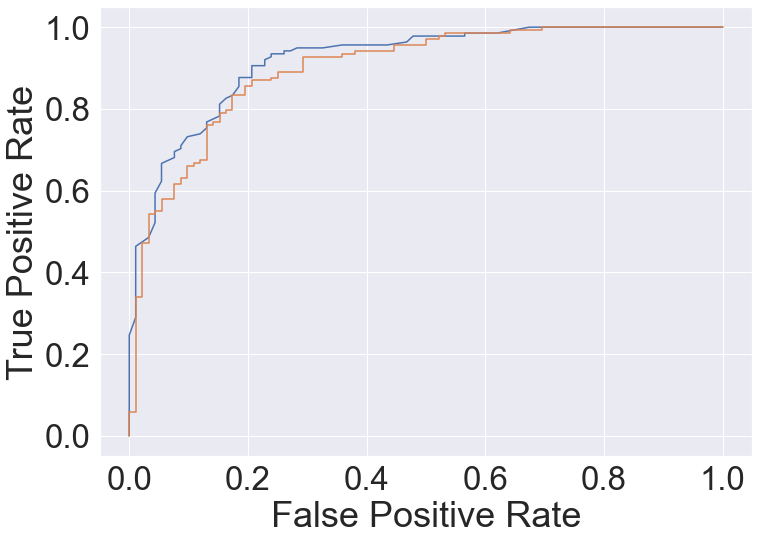

In [170]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The training r2: 0.98401
The test     r2: 0.86957


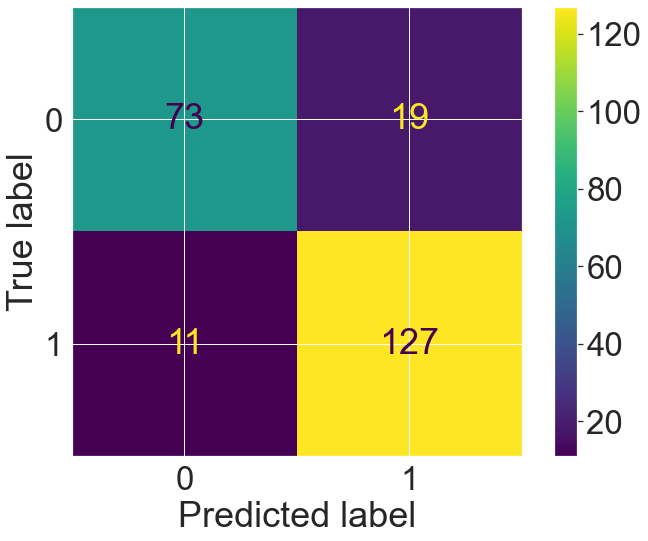

<BarContainer object of 15 artists>

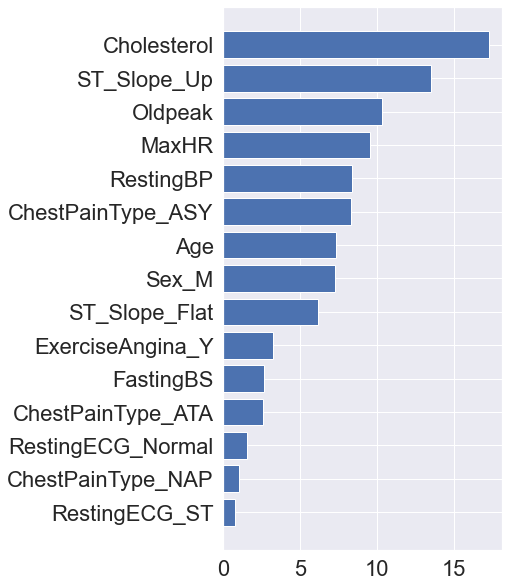

In [176]:
# CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = CatBoostClassifier(random_state=0, silent=True)
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()
sorted_idx = model.feature_importances_.argsort()
sns.set(rc = {'figure.figsize':(5,10)})
sns.set(font_scale = 2)
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15])

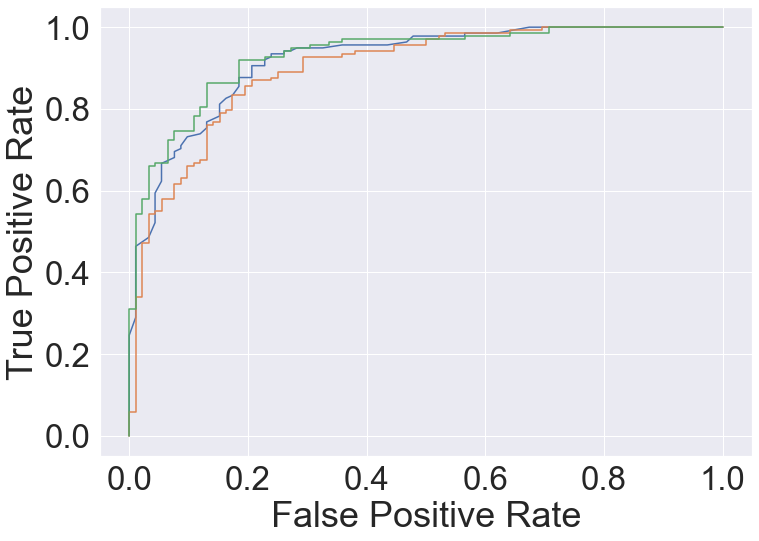

In [175]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()